<a href="https://colab.research.google.com/github/ekourkchi/incNET/blob/master/fashion_mnist_VGG6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

0
(28, 28)


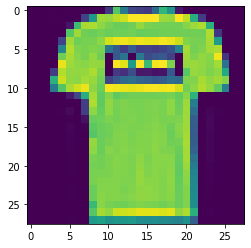

In [41]:
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1].shape)

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [44]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4984 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3742 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3356 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3116 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2935 - acc: 0.8915


In [45]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3616 - acc: 0.8723


[0.36157066185474396, 0.8723]

In [52]:
n,nx,ny =training_images.shape
training_images_new = np.resize(training_images, (n,nx,ny,1))

n,nx,ny =test_images.shape
test_images_new = np.resize(test_images, (n,nx,ny,1))

test_images_new.shape

(10000, 28, 28, 1)

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np
def vgg6(input_shape=(28, 28, 1), n_classes: int = 10):
    """
        VGG6
    :param input_shape:
    :param n_classes:
    :return:
    """

    model = tf.keras.models.Sequential(name='VGG6')
    # input: 21x21 images with 1 channel -> (21, 21, 1) tensors.
    # this applies 16 convolution filters of size 3x3 each.
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, name='conv1'))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', name='conv2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv3'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv4'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(256, activation='relu', name='fc_1'))
    model.add(tf.keras.layers.Dropout(0.5))
    # output layer
    activation = 'sigmoid' if n_classes == 1 else 'softmax'
    model.add(tf.keras.layers.Dense(n_classes, activation=activation, name='fc_out'))

    return model

In [51]:
vgg_model = vgg6()
vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
n_epochs=15
vgg_model.summary()
vgg_model_history = vgg_model.fit(training_images_new, training_labels, epochs=n_epochs, batch_size=1024, verbose=2, shuffle=True)


Model: "VGG6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 26, 26, 16)        160       
_________________________________________________________________
conv2 (Conv2D)               (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 10, 10, 32)        4640      
_________________________________________________________________
conv4 (Conv2D)               (None, 8, 8, 32)          9248      
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 8, 8, 32)          128    

In [0]:
classes = vgg_model.predict(test_images_new)

In [61]:
for i in range(20):
  print(test_labels[i], np.argmax(classes[i]))

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7
4 4
5 5
7 5
3 3
4 4
1 1
2 2
4 6
8 8
0 0
